In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
%matplotlib inline

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

https://gist.github.com/oculushut/193a7c2b6002d808a791

In [2]:
url='https://raw.githubusercontent.com/rasbt/' +\
    'python-machine-learning-book-2nd-edition' +\
    '/master/code/ch10/housing.data.txt'

In [3]:
#filename, headers = urllib.request.urlretrieve(url, "housing.data.txt")

In [4]:
#filename # 'housing.data.txt'

In [5]:
#headers.items()

```
[('Content-Security-Policy',
  "default-src 'none'; style-src 'unsafe-inline'; sandbox"),
 ('Strict-Transport-Security', 'max-age=31536000'),
 ('X-Content-Type-Options', 'nosniff'),
 ('X-Frame-Options', 'deny'),
 ('X-XSS-Protection', '1; mode=block'),
 ('ETag', '"b488787b8ed4cef8e09014dbb51582e4a51fe9e1"'),
 ('Content-Type', 'text/plain; charset=utf-8'),
 ('Cache-Control', 'max-age=300'),
 ('X-Geo-Block-List', ''),
 ('X-GitHub-Request-Id', 'C04C:3C59:4340DF:484BC4:5C3ABE4D'),
 ('Content-Length', '49081'),
 ('Accept-Ranges', 'bytes'),
 ('Date', 'Sun, 13 Jan 2019 04:30:02 GMT'),
 ('Via', '1.1 varnish'),
 ('Connection', 'close'),
 ('X-Served-By', 'cache-atl6233-ATL'),
 ('X-Cache', 'HIT'),
 ('X-Cache-Hits', '1'),
 ('X-Timer', 'S1547353802.150938,VS0,VE1'),
 ('Vary', 'Authorization,Accept-Encoding'),
 ('Access-Control-Allow-Origin', '*'),
 ('X-Fastly-Request-ID', 'f5b435ddab7c5cd588683669f2b0b247756dff74'),
 ('Expires', 'Sun, 13 Jan 2019 04:35:02 GMT'),
 ('Source-Age', '125')]
```

In [6]:
# df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
#                  'python-machine-learning-book-2nd-edition'
#                  '/master/code/ch10/housing.data.txt',
#                  header=None,
#                  sep='\s+')

In [7]:
df = pd.read_csv("housing.data.txt", header=None, sep="\s+")

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
X = df[['RM']].values
y = df['MEDV'].values

#### Build the Model

In [13]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


In [15]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return

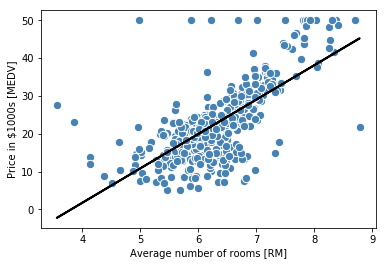

In [16]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

#plt.savefig('images/10_07.png', dpi=300)
plt.show()

In [19]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
print(X.shape)

(506, 13)

In [21]:
slr1 = LinearRegression()
slr1.fit(X_train, y_train)
y_train_pred = slr1.predict(X_train)
y_test_pred = slr1.predict(X_test)

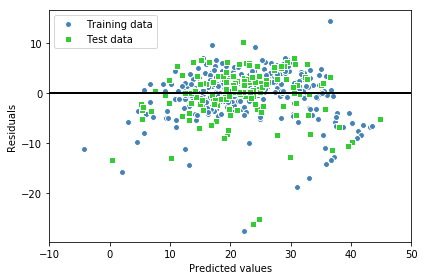

In [22]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()

In [24]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196
R^2 train: 0.765, test: 0.673


#### LASSO Regression

In [33]:
#lasso = Lasso(alpha=0.1)
#lasso = Lasso(alpha=1.0)
#lasso = Ridge(alpha=1.0)
lasso = ElasticNet(alpha=1.0, l1_ratio=0.5)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.08344408  0.05179376 -0.01702468  0.         -0.          0.90890973
  0.01218953 -0.83010765  0.23558231 -0.01502425 -0.84881663  0.00687826
 -0.72504946]


In [34]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 24.381, test: 31.874
R^2 train: 0.712, test: 0.617


```
MSE train: 20.926, test: 28.876
R^2 train: 0.753, test: 0.653
```

In [37]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [38]:
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

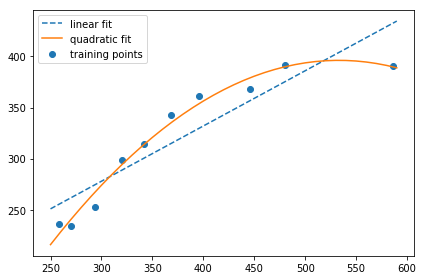

In [39]:
# fit linear features
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# fit quadratic features
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# plot results
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/10_10.png', dpi=300)
plt.show()

In [40]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [42]:
print('Training MSE linear: %.3f, quadratic: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982
